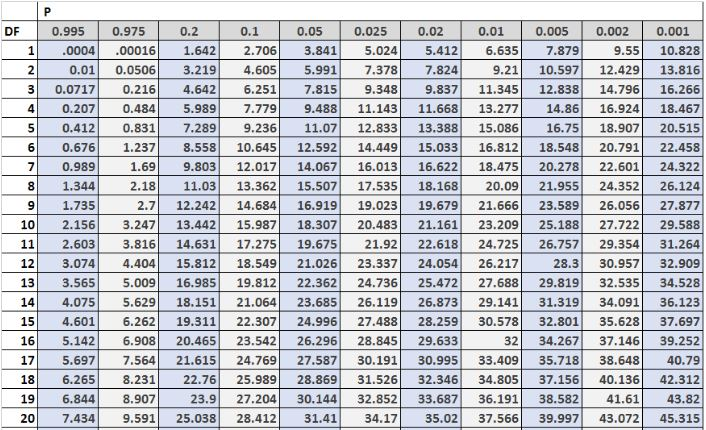

In [3]:
import numpy as np
from scipy import stats
import pandas as pd

titanic = pd.read_csv('train.csv')

# Задачи на тест независимости



1.   Даны данные о предпочтениях жителей города по трем видам спорта (футбол, баскетбол, теннис) в разрезе по полу (мужчины, женщины). Проведите Хи-квадрат тест независимости и определите, есть ли статистически значимые различия в предпочтениях спорта между мужчинами и женщинами.
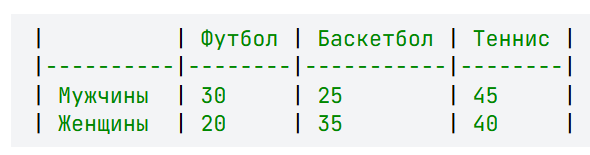
2.   Исследование было проведено среди группы людей разных возрастных категорий для выявления предпочтений в музыкальных жанрах (рок, поп, джаз). Представлены данные в таблице сопряженности. Проведите Хи-квадрат тест независимости и определите, есть ли статистически значимая связь между возрастными группами и предпочтениями музыкальных жанров.
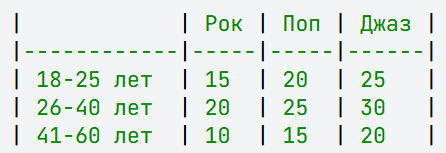
3. Докажите с помощью хи-квадрата Пирсона, что шанс выжить на Титанике зависит от типа каюты. Проиллюстрируйте полученные результаты в виде гистограммы.



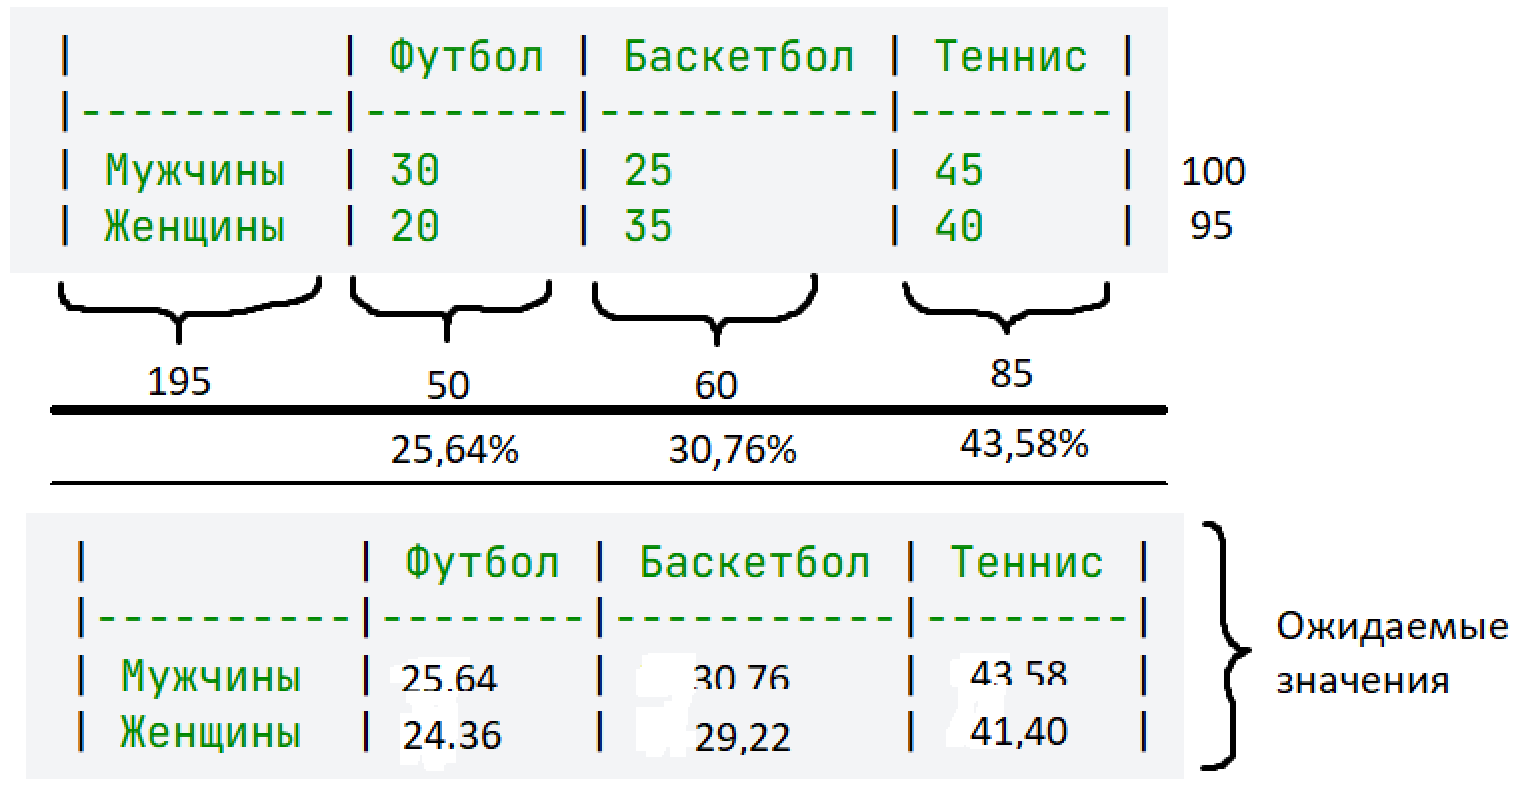

In [8]:
men = [30, 25, 45]
women = [20, 35, 40]

data = [men, women]
chi2_stat, p_val, dof, expected = stats.chi2_contingency(data)
print(f"Хи-квадрат статистика: {chi2_stat}\n")
print(f'Ожидаемые значения: {expected}\n')
print(f"p-значение: {p_val}\n")
print(f'степень свободы таблицы: {dof}')

Хи-квадрат статистика: 3.835100619195046

Ожидаемые значения: [[25.64102564 30.76923077 43.58974359]
 [24.35897436 29.23076923 41.41025641]]

p-значение: 0.14696654405078635

степень свободы таблицы: 2


In [9]:
data = [[15,20,25],
        [20,25,30],
        [10,15,20]]
chi2_stat, p_val, dof, expected = stats.chi2_contingency(data)
print(f"Хи-квадрат статистика: {chi2_stat}\n")
print(f'Ожидаемые значения: {expected}\n')
print(f"p-значение: {p_val}\n")
print(f'степень свободы таблицы: {dof}')

Хи-квадрат статистика: 0.3555555555555555

Ожидаемые значения: [[15.   20.   25.  ]
 [18.75 25.   31.25]
 [11.25 15.   18.75]]

p-значение: 0.9859512636026772

степень свободы таблицы: 4


In [10]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
titanic['missing'] = titanic['Survived'].apply(lambda x: 0 if x==1 else 1)

In [24]:
titanic[titanic['Pclass'] == 3]['Survived'].value_counts()

Survived
0    372
1    119
Name: count, dtype: int64

In [17]:
data = titanic.groupby('Pclass')[['Survived','missing']].sum()

In [19]:
data

,Survived,missing
Pclass,,
1,136,80
2,87,97
3,119,372


H0 - Выживаемость не зависит от типа каюты

H1 - выживаемость зависит от типа каюты




In [25]:

chi2_stat, p_value, dof, expected = stats.chi2_contingency(data)
print(f"Хи-квадрат статистика: {chi2_stat}\n")
print(f'Ожидаемые значения: {expected}\n')
print(f"p-значение: {p_value}\n")
print(f'степень свободы таблицы: {dof}')

Хи-квадрат статистика: 102.88898875696057

Ожидаемые значения: [[ 82.90909091 133.09090909]
 [ 70.62626263 113.37373737]
 [188.46464646 302.53535354]]

p-значение: 4.5492517112987287e-23

степень свободы таблицы: 2


**Ответ: Выживаемость зависит от типа каюты**

In [89]:
import seaborn as sns
dict_data = data.to_dict(orient='list')
list_data = list(dict_data.values())
proba_survived = {'Pclass '+str(i) : [x/(y+x) * 100] for x, y, i in zip(list_data[0], list_data[1], range(1,4))}
pd.DataFrame(proba_survived)

,Pclass 1,Pclass 2,Pclass 3
0,62.962963,47.282609,24.236253


Text(0, 0.5, 'Вероятность выживания, %')

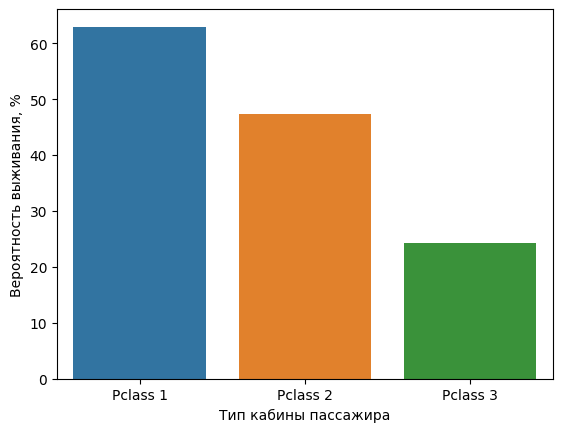

In [92]:
import matplotlib.pyplot as plt
sns.barplot(pd.DataFrame(proba_survived))
plt.xlabel('Тип кабины пассажира')
plt.ylabel('Вероятность выживания, %')

# Задачи на тест приспособленности

1. Имеется информация о том, как люди предпочитают проводить свой досуг: дома, с друзьями или в общественных местах. Проведите Хи-квадрат тест приспособленности для данных и определите, соответствуют ли фактические предпочтения ожидаемым равномерным частотам для каждой категории.
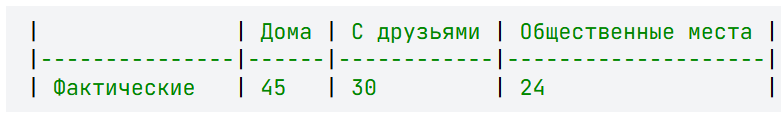

2. Проведен опрос среди студентов по предпочтительным способам подготовки к экзаменам: самостоятельно, в группе или с репетитором. Проведите Хи-квадрат тест приспособленности для этих данных и определите, есть ли статистически значимые отличия между фактическими предпочтениями и предполагаемым равномерным распределением.
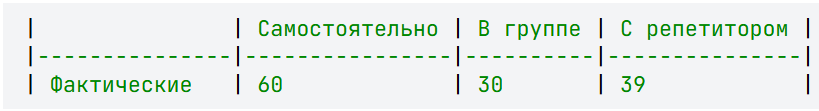

3. Имеются данные о предпочтениях людей по выбору транспорта для поездок: автомобиль, общественный транспорт, велосипед. Проведите Хи-квадрат тест приспособленности и определите, соответствуют ли фактические предпочтения ожидаемым равномерным частотам для каждой категории.
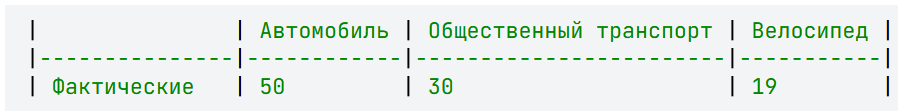

In [93]:
observed = [45, 30, 24]
expected = [33, 33, 33]  # Предполагаемое распределение
chi2_stat, p_val = stats.chisquare(observed, f_exp=expected)
print(f"Хи-квадрат статистика: {chi2_stat}")
print(f"p-значение: {p_val}")


Хи-квадрат статистика: 7.09090909090909
p-значение: 0.02885550339038823


In [98]:
observed = [60, 30, 39]
expected = [43, 43, 43]  # Предполагаемое распределение
chi2_stat, p_val = stats.chisquare(observed, f_exp=expected)
print(f"Хи-квадрат статистика: {chi2_stat}")
print(f"p-значение: {p_val}")

Хи-квадрат статистика: 11.02325581395349
p-значение: 0.004039526055132766


In [99]:
observed = [50, 30, 19]
expected = [33, 33, 33]  # Предполагаемое распределение
chi2_stat, p_val = stats.chisquare(observed, f_exp=expected)
print(f"Хи-квадрат статистика: {chi2_stat}")
print(f"p-значение: {p_val}")

Хи-квадрат статистика: 14.96969696969697
p-значение: 0.0005615282435635938
